In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [2]:
missing_values = ["n/a", "na", "--"]

In [3]:
gold = pd.read_csv("GoldDataFinal.csv", sep = ",",na_values = missing_values)
silver = pd.read_csv("SilverDataFinal.csv", sep = ",",na_values = missing_values)
oil = pd.read_csv("OilDataFinal.csv", sep = ",",na_values = missing_values)
gas = pd.read_csv("GasDataFinal.csv", sep = ",",na_values = missing_values)
gold.head()

,Id,golddate,openprice,highprice,lowprice,closeprice,volume,created_at
0,1,2015-03-25 00:00:00,16.950001,17.045000,16.950001,16.980,146,2019-05-02 23:07:15
1,2,2015-03-26 00:00:00,17.315001,17.325001,17.055000,17.122,97,2019-05-02 23:07:15
2,3,2015-03-27 00:00:00,17.010000,17.010000,17.010000,17.052,11,2019-05-02 23:07:15
3,4,2015-03-29 00:00:00,16.990000,16.990000,16.898001,16.910,0,2019-05-02 23:07:15
4,5,2015-03-30 00:00:00,16.754999,16.754999,16.655001,16.657,8,2019-05-02 23:07:15


In [4]:
gold.drop(["Id","created_at"], axis=1, inplace=True)
silver.drop(["Id","created_at"], axis=1, inplace=True)
oil.drop(["Id","created_at"], axis=1, inplace=True)
gas.drop(["Id","created_at"], axis=1, inplace=True)

In [5]:
gold_missing = gold.isnull().sum()
silver_missing = silver.isnull().sum()
oil_missing = oil.isnull().sum()
gas_missing = gas.isnull().sum()

In [6]:
print(gold_missing,silver_missing,oil_missing,gas_missing)

golddate      0
openprice     0
highprice     0
lowprice      0
closeprice    0
volume        0
dtype: int64 silverdate    0
openprice     0
highprice     0
lowprice      0
closeprice    0
volume        0
dtype: int64 oildate       0
openprice     0
highprice     0
lowprice      0
closeprice    0
volume        0
dtype: int64 gasdate       0
openprice     0
highprice     0
lowprice      0
closeprice    0
volume        0
dtype: int64


In [7]:
gold["golddate"]= gold["golddate"].apply(lambda x:timestring.Date(x).date)
silver["silversdate"]= silver["silverdate"].apply(lambda x:timestring.Date(x).date)
oil["oildate"]= oil["oildate"].apply(lambda x:timestring.Date(x).date)
gas["gasdate"]= gas["gasdate"].apply(lambda x:timestring.Date(x).date)
gold.head()

,golddate,openprice,highprice,lowprice,closeprice,volume
0,2015-03-25,16.950001,17.045000,16.950001,16.980,146
1,2015-03-26,17.315001,17.325001,17.055000,17.122,97
2,2015-03-27,17.010000,17.010000,17.010000,17.052,11
3,2015-03-29,16.990000,16.990000,16.898001,16.910,0
4,2015-03-30,16.754999,16.754999,16.655001,16.657,8


In [8]:
gold.index = pd.to_datetime(gold["golddate"])
gold = gold.loc['2019-04-01':]

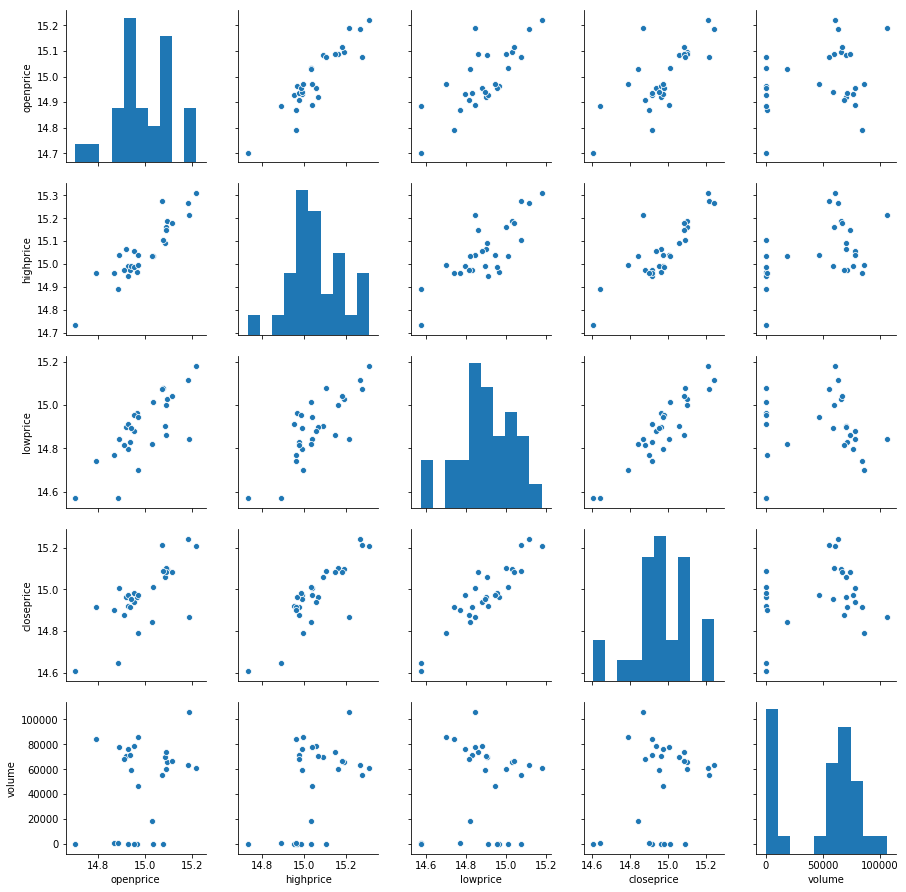

In [9]:
sns.pairplot(gold)

In [10]:
silver.index = pd.to_datetime(silver["silverdate"])
silver = silver.loc['2019-04-01':]

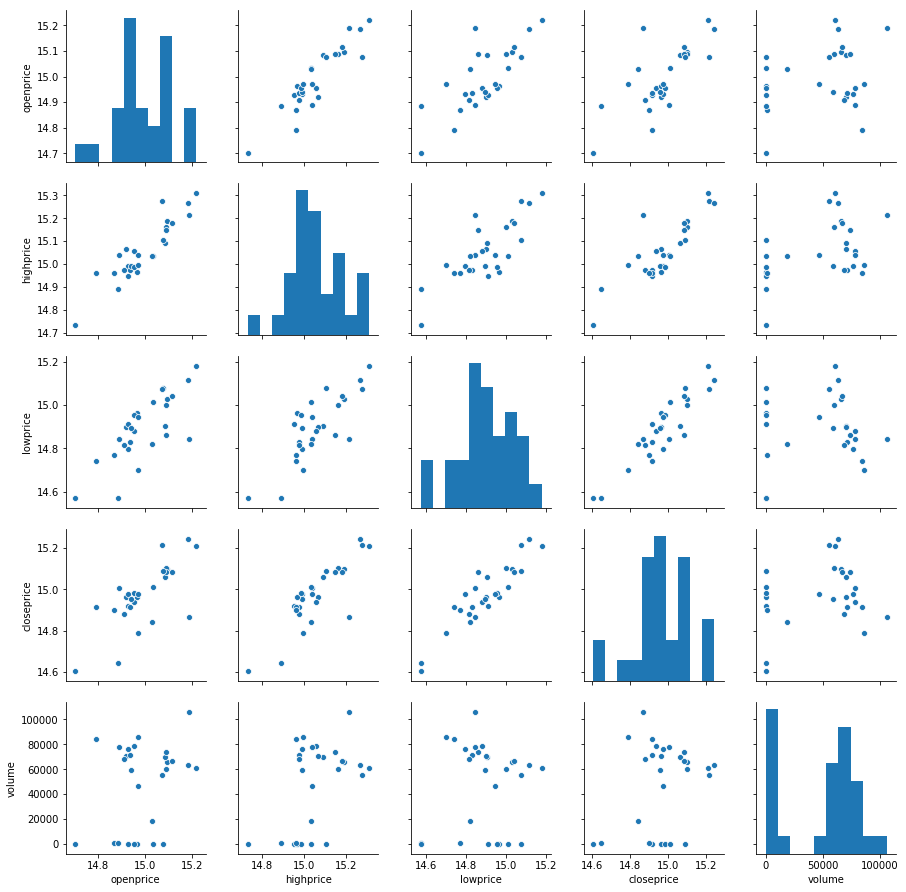

In [11]:
sns.pairplot(silver)

In [12]:
oil.index = pd.to_datetime(oil["oildate"])
oil = oil.loc['2019-04-01':]

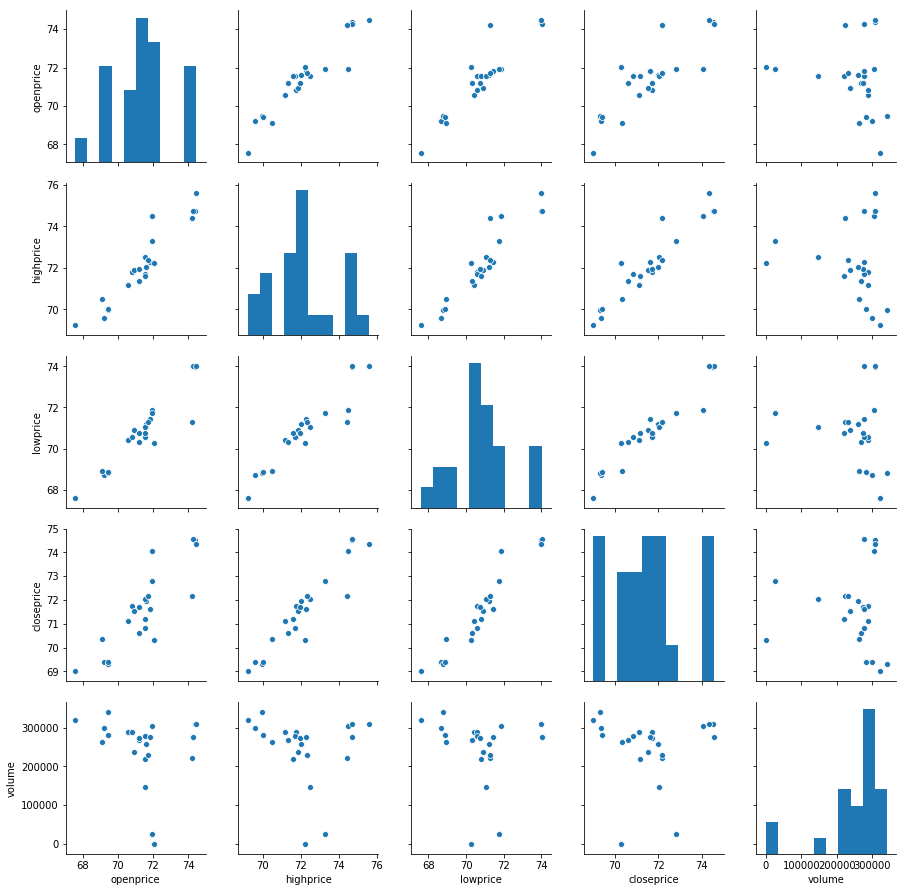

In [13]:
sns.pairplot(oil)

In [14]:
gas.index = pd.to_datetime(gas["gasdate"])
gas = gas.loc['2019-04-01':]

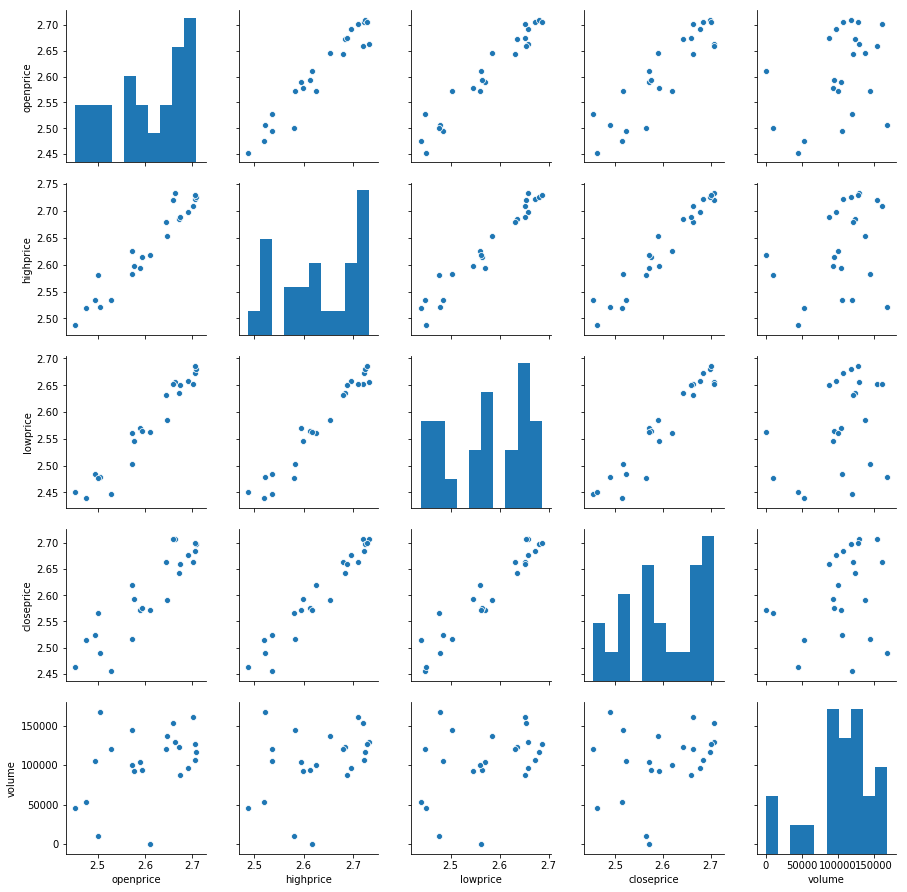

In [15]:
sns.pairplot(gas)

In [16]:
combained = pd.concat([gold["golddate"],gold["closeprice"],silver["closeprice"],
                     oil["closeprice"],gas["closeprice"]
                      ]
                      , keys = ["date","goldprice","silverprice","oilprice","gasprice"], axis = 1).ffill().bfill()


combained.to_csv("combined.csv", sep=',', encoding='utf-8')
combained

,date,goldprice,silverprice,oilprice,gasprice
2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664
2019-04-07,2019-04-07,15.088,15.088,70.339996,2.664
2019-04-08,2019-04-08,15.216,15.216,71.099998,2.708
2019-04-09,2019-04-09,15.211,15.211,70.610001,2.699
2019-04-10,2019-04-10,15.244,15.244,71.730003,2.700
2019-04-11,2019-04-11,14.867,14.867,70.830002,2.664
